# Redes Neuronales Artificiales (RNA)


## Parte 1 - Preprocesado de los datos

### Importar las librerías


In [ ]:
!pip install scikeras[tensorflow]  # Para utilizar la clase KerasClassifier()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 73.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 38.1 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.4
    Uninstalling gast-0.5.4:
      Successfully uninstalled gast-0.5.4
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.1

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier


### Importar el dataset


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

%cd "/content/drive/MyDrive/deeplearning-az/Notebooks/Part 1 - Artificial Neural Networks (ANN)"

Mounted at /content/drive
/content/drive/MyDrive/deeplearning-az/Notebooks/Part 1 - Artificial Neural Networks (ANN)


In [ ]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0



### Codificar datos categóricos


In [ ]:
X = df.drop(columns=["RowNumber", "CustomerId", "Surname", "Exited"])
X = pd.get_dummies(X, columns=["Geography", "Gender"], drop_first=True)
y = df["Exited"]

X = X.values  # Nos quedamos con los valores de las variables dependientes
y = y.values  # Nos quedamos con los valores de la variables respuesta


### Dividir el dataset en Conjunto de Entrenamiento y Conjunto de Test


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Escalado de variables


In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Parte 2 - Construir la RNA




In [ ]:
# Inicializar la RNA
classifier = Sequential()

# Añadir las capas de entrada y primera capa oculta
classifier.add(Dense(units=6, kernel_initializer="uniform",
                     activation="relu", input_dim=11))
classifier.add(Dropout(rate=0.1))

# Añadir la segunda capa oculta
classifier.add(Dense(units=6, kernel_initializer="uniform", activation="relu"))
classifier.add(Dropout(rate=0.1))

# Añadir la capa de salida
classifier.add(Dense(units=1, kernel_initializer="uniform", activation="sigmoid"))

# Compilar la RNA
classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Ajustamos la RNA al Conjunto de Entrenamiento
classifier.fit(X_train, y_train,  batch_size = 10, epochs = 100)

Epoch 1/100
800/800 [==============================] - 11s 4ms/step - loss: 0.5019 - accuracy: 0.7972
Epoch 2/100
800/800 [==============================] - 3s 4ms/step - loss: 0.4260 - accuracy: 0.8225
Epoch 3/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4170 - accuracy: 0.8229
Epoch 4/100
800/800 [==============================] - 3s 3ms/step - loss: 0.4108 - accuracy: 0.8227
Epoch 5/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4075 - accuracy: 0.8244
Epoch 6/100
800/800 [==============================] - 3s 3ms/step - loss: 0.4053 - accuracy: 0.8211
Epoch 7/100
800/800 [==============================] - 4s 5ms/step - loss: 0.4047 - accuracy: 0.8240
Epoch 8/100
800/800 [==============================] - 5s 6ms/step - loss: 0.4038 - accuracy: 0.8214
Epoch 9/100
800/800 [==============================] - 3s 4ms/step - loss: 0.4009 - accuracy: 0.8253
Epoch 10/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3984 - accur

## Parte 3 - Evaluar el modelo y calcular predicciones finales


### Predicción de los resultados con el Conjunto de Test

In [ ]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 2ms/step


### Elaborar una matriz de confusión



              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1595
           1       0.78      0.40      0.52       405

    accuracy                           0.85      2000
   macro avg       0.82      0.68      0.72      2000
weighted avg       0.85      0.85      0.84      2000



<Axes: >

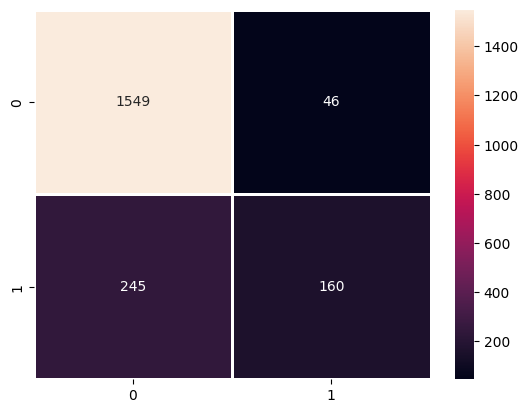

In [ ]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, linewidths=1, annot=True, fmt=".0f")

In [ ]:
# Valor del accuracy
acc = (cm[0][0] + cm[1][1]) / cm.sum()
print(acc)

0.8545


## RETO FINAL: ¿Deberíamos despedirnos de ese cliente?

Utiliza nuestro modelo de RNA para predecir si el cliente con la siguiente información abandonará el banco:

- Geografia: Francia

- Puntaje de crédito: 600

- Género masculino

- Edad: 40 años de edad

- Tenencia: 3 años.

- Saldo: $\$60000$

- Número de productos: 2

- ¿Este cliente tiene una tarjeta de crédito? Sí

- ¿Es este cliente un miembro activo? Sí

- Salario estimado: $\$50000$

Entonces, ¿deberíamos decir adiós a ese cliente?

In [ ]:
# Escalamos la observación
X_test_observacion = sc_X.transform(np.array([[600, 40, 3, 60000, 2, 1, 1, 50000, 0, 0, 1]]))

# Escalamos la observación
y_pred_observacion = classifier.predict(X_test_observacion)

# Establecemos punto de corte donde se determina cuando es 0/1 (False/True)
y_pred_observacion = (y_pred_observacion > 0.5)

if y_pred_observacion:
    print("Se predice que el cliente SÍ abandonará el banco")
else:
    print("Se predice que el cliente NO abandonará el banco")

1/1 [==============================] - 0s 26ms/step
Se predice que el cliente NO abandonará el banco


## Parte 4 - Evaluar, mejorar y Ajustar la RNA

### Evaluar la RNA

In [ ]:
def build_classifier():
    # Inicializar la RNA
    classifier = Sequential()

    # Añadir las capas de entrada y primera capa oculta
    classifier.add(Dense(units=6, kernel_initializer="uniform",
                         activation="relu", input_dim=11))

    # Añadir la segunda capa oculta
    classifier.add(Dense(units=6, kernel_initializer="uniform", activation="relu"))

    # Añadir la capa de salida
    classifier.add(Dense(units=1, kernel_initializer="uniform", activation="sigmoid"))

    # Compilar la RNA
    classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

    # Devolver el clasificador
    return classifier

In [ ]:
classifier = KerasClassifier(model=build_classifier, batch_size=10, epochs=100)
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 33.2min finished


In [ ]:
accuracies

array([0.85125, 0.83875, 0.82625, 0.86625, 0.83125, 0.8175 , 0.87   ,
       0.8225 , 0.81125, 0.84375])

In [ ]:
mean = accuracies.mean()
variance = accuracies.std()
print(mean)
print(variance)

0.837875
0.018949356849244234


### Mejorar la RNA
#### Regularización de Dropout para evitar el *overfitting*

```python
# Donde rate=0.1 indica que hay un 10% de probabilidad de desactivar una de las
# neuronas de la capa programada anteriormente
classifier.add(Dropout(rate=0.1))
```

### Ajustar la RNA

In [ ]:
def build_classifier(optimizer):
    # Inicializar la RNA
    classifier = Sequential()

    # Añadir las capas de entrada y primera capa oculta
    classifier.add(Dense(units=6, kernel_initializer="uniform",
                         activation="relu", input_dim=11))

    # Añadir la segunda capa oculta
    classifier.add(Dense(units=6, kernel_initializer="uniform", activation="relu"))

    # Añadir la capa de salida
    classifier.add(Dense(units=1, kernel_initializer="uniform", activation="sigmoid"))

    # Compilar la RNA
    classifier.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

    # Devolver el clasificador
    return classifier

In [ ]:
classifier = KerasClassifier(model=build_classifier)

In [ ]:
parameters = {
    "batch_size": [32, 64],
    "epochs": [200, 500],
    # hiperparámetros dentro de la arquitectura de la red tienen que ir con model__*
    "model__optimizer": ["adam", "rmsprop"]
}

In [ ]:
grid_search = GridSearchCV(estimator=classifier,
                           param_grid=parameters,
                           scoring="accuracy",
                           cv=10,
                           n_jobs=-1,
                           verbose=1)

grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

Fitting 10 folds for each of 8 candidates, totalling 80 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Epoch 1/500
250/250 [==============================] - 3s 4ms/step - loss: 0.5961 - accuracy: 0.7945
Epoch 2/500
250/250 [==============================] - 1s 4ms/step - loss: 0.4458 - accuracy: 0.7960
Epoch 3/500
250/250 [==============================] - 1s 4ms/step - loss: 0.4322 - accuracy: 0.7960
Epoch 4/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4285 - accuracy: 0.7960
Epoch 5/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4257 - accuracy: 0.7960
Epoch 6/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4229 - accuracy: 0.7960
Epoch 7/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4205 - accuracy: 0.8026
Epoch 8/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4182 - accuracy: 0.8225
Epoch 9/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4171 - accuracy: 0.8263
Epoch 10/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4158 - accura

In [ ]:
print(best_parameters)
print(best_accuracy)

{'batch_size': 32, 'epochs': 500, 'model__optimizer': 'rmsprop'}
0.8488749999999999


## RETO FINAL: A por la medalla de oro del podio

En el código anterior se han utilizado los siguientes posibles de hiperparámetros:

```python
parameters = {
    "batch_size": [32, 64],
    "epochs": [200, 500],
    "model__optimizer": ["adam", "rmsprop"]
}
```

El mejor accuracy obtenido ha sido de 0.849.

- Medalla de oro🥇: precisión superior al 86% ❌

- Medalla de plata🥈: precisión entre 85% y 86% ❌

- Medalla de bronce🥉: precisión entre 84% y 85% ✅

Ampliando el rango de valores de la parrilla de GridSearch (hiperparámetros), el número de capas ocultas así como sus nodos, es posible aumentar el valor del accuracy. Por los largos tiempos de entrenamiento se ha decidido utilizar únicamente los anteriores.